In [148]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
nltk.download("stopwords")

dataset = pd.read_csv("SMSSpamCollection.txt", sep="\t", names=["label","texts"])
dataset['label'] = dataset['label'].replace({'ham': 'Not Spam'})
dataset.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NASHEED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,texts
0,Not Spam,"Go until jurong point, crazy.. Available only ..."
1,Not Spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not Spam,U dun say so early hor... U c already then say...
4,Not Spam,"Nah I don't think he goes to usf, he lives aro..."


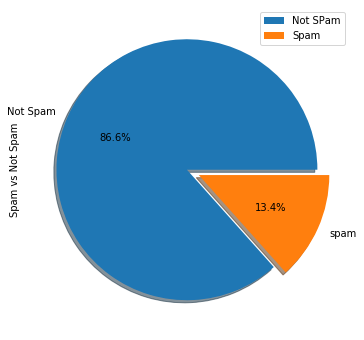

In [67]:
dataset["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Not Spam")
plt.legend(["Not SPam", "Spam"])
plt.show()

In [73]:
porter_stemmer = PorterStemmer()
corpus =[]
for i in range(0,len(dataset)):
    newdataset = re.sub('[^a-zA-Z]', ' ' ,dataset['texts'][i])
    newdataset = newdataset.lower()
    newdataset = newdataset.split()
    
    newdataset = [porter_stemmer.stem(word) for word in newdataset if not word in stopwords.words('english')] 
    newdataset =' '.join(newdataset)
    corpus.append(newdataset)
    

In [78]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [223]:
cv=CountVectorizer(max_features = 5000)

In [163]:
X= cv.fit_transform(corpus).toarray()


In [175]:
y=pd.get_dummies(dataset["label"])
y=y.iloc[:,1].values

In [176]:
X_train, X_test ,y_train , y_test = train_test_split(X,y,test_size =0.20 ,random_state=0)

In [177]:
spam_detection_model = MultinomialNB().fit(X_train , y_train)

In [178]:
y_pred = spam_detection_model.predict(X_test)

In [179]:
c_matrix = confusion_matrix(y_test,y_pred)

In [180]:
c_matrix

array([[946,   9],
       [  8, 152]], dtype=int64)

In [181]:
accuracy = accuracy_score(y_test , y_pred)

In [182]:
accuracy

0.9847533632286996